In [6]:
import warnings; 
warnings.simplefilter('ignore')

In [7]:
import pandas as pd
from prophet import Prophet

In [8]:
df = pd.read_csv('station_bike_count.csv')

In [9]:
print(df.shape)
print(df.head())

(151841, 4)
   sayi  sta_id       sta_name          tarih
0     1      40   DOGU KAMPUSU  2018-04-01 08
1     3      27   BAHCELIEVLER  2018-04-01 09
2     1      36  DIS HASTANESI  2018-04-01 09
3     1      23        YURTLAR  2018-04-01 09
4     4      23        YURTLAR  2018-04-01 10


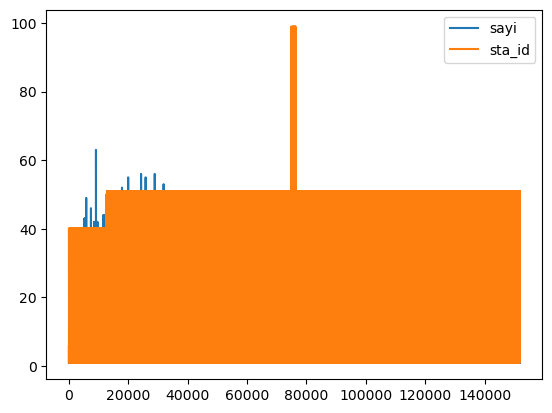

In [10]:
from matplotlib import pyplot

df.plot()
pyplot.show()

In [8]:
df['Hour'] = df['tarih'].apply(lambda x: str(x)[-2:])
df['Day'] = df['tarih'].apply(lambda x: str(x)[-5:-2])
df['Month'] = df['tarih'].apply(lambda x: str(x)[-8:-5])
df['Year'] = df['tarih'].apply(lambda x: str(x)[:-8])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day']+'-'+df['Hour']+':'+'00')

In [9]:
df.head()

,sayi,sta_id,sta_name,tarih,Hour,Day,Month,Year,ds
0,1,40,DOGU KAMPUSU,2018-04-01 08,08,01,04-,2018-,2018-04-01 08:00:00
1,3,27,BAHCELIEVLER,2018-04-01 09,09,01,04-,2018-,2018-04-01 09:00:00
2,1,36,DIS HASTANESI,2018-04-01 09,09,01,04-,2018-,2018-04-01 09:00:00
3,1,23,YURTLAR,2018-04-01 09,09,01,04-,2018-,2018-04-01 09:00:00
4,4,23,YURTLAR,2018-04-01 10,10,01,04-,2018-,2018-04-01 10:00:00


In [10]:
df = df.loc[(df['sta_id']==11)]
df.drop(['tarih', 'sta_id', 'sta_name', 'Hour', 'Day', 'Month','Year'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [11]:
df.head()

,y,ds
42,7,2018-04-01 13:00:00
75,6,2018-04-01 14:00:00
97,6,2018-04-01 15:00:00
105,11,2018-04-01 16:00:00
144,14,2018-04-01 17:00:00


In [12]:
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

15:44:17 - cmdstanpy - INFO - Chain [1] start processing
15:44:18 - cmdstanpy - INFO - Chain [1] done processing


In [14]:
future = m.make_future_dataframe(periods=900,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-04-01 13:00:00,4.149218,-3.697636,16.711627,4.149218,4.149218,2.226005,2.226005,2.226005,4.793401,4.793401,4.793401,-2.567396,-2.567396,-2.567396,0.0,0.0,0.0,6.375223
1,2018-04-01 14:00:00,4.154079,-1.537214,20.197524,4.154079,4.154079,5.264838,5.264838,5.264838,7.747978,7.747978,7.747978,-2.483140,-2.483140,-2.483140,0.0,0.0,0.0,9.418917
2,2018-04-01 15:00:00,4.158940,2.713705,23.305383,4.158940,4.158940,8.540648,8.540648,8.540648,10.928267,10.928267,10.928267,-2.387619,-2.387619,-2.387619,0.0,0.0,0.0,12.699587
3,2018-04-01 16:00:00,4.163800,4.737882,25.317231,4.163800,4.163800,11.028099,11.028099,11.028099,13.309699,13.309699,13.309699,-2.281600,-2.281600,-2.281600,0.0,0.0,0.0,15.191899
4,2018-04-01 17:00:00,4.168661,4.694015,26.354395,4.168661,4.168661,11.444880,11.444880,11.444880,13.610809,13.610809,13.610809,-2.165928,-2.165928,-2.165928,0.0,0.0,0.0,15.613541


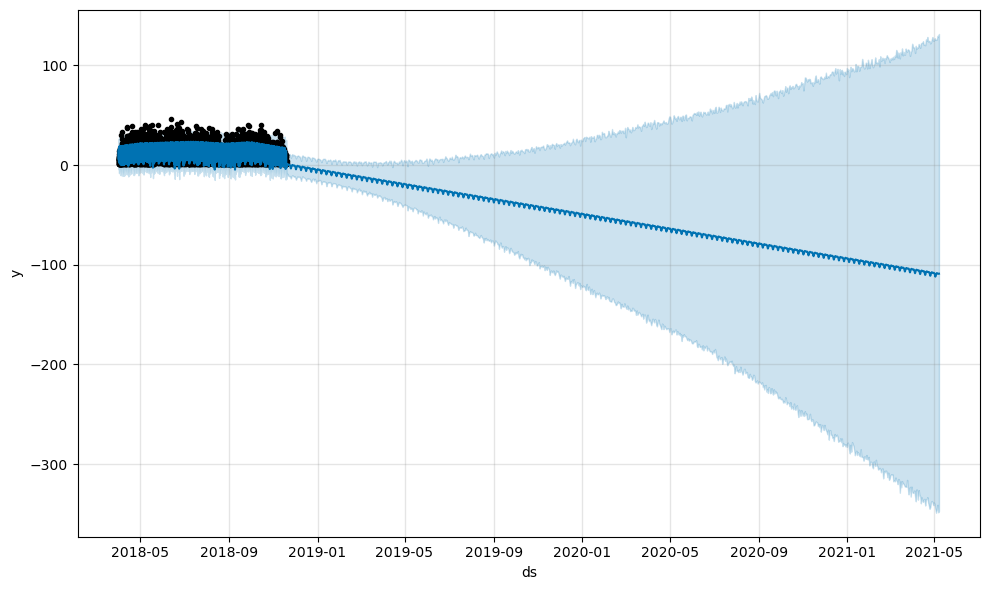

In [15]:
plot1 = m.plot(forecast)

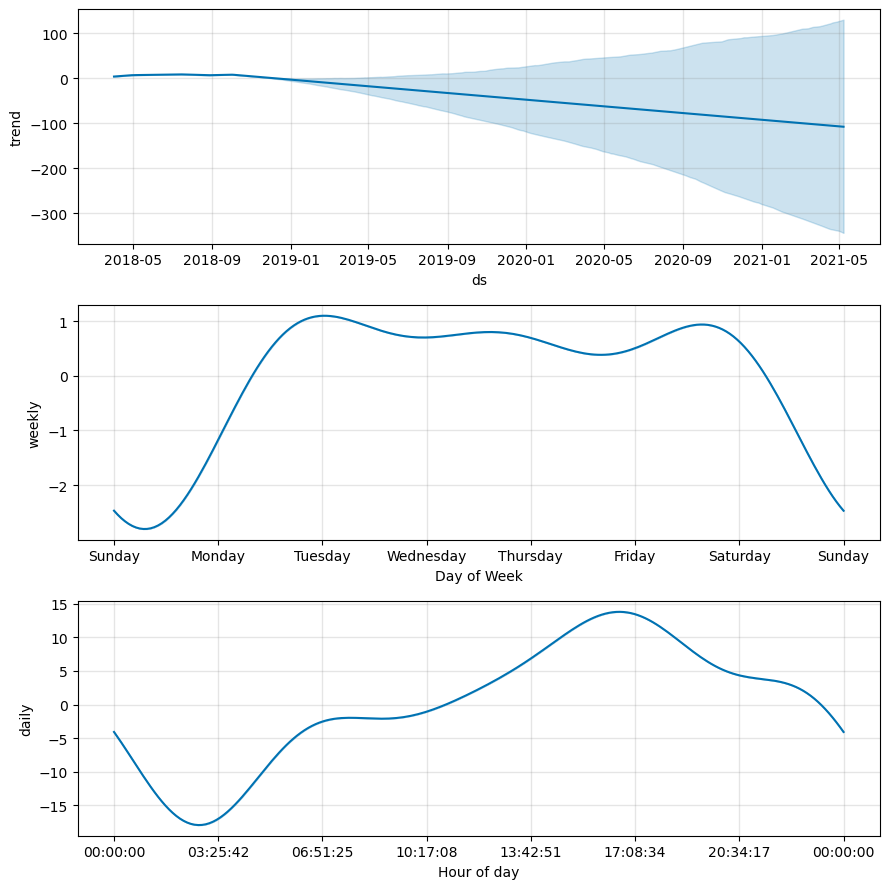

In [16]:
plt2 = m.plot_components(forecast)